In [99]:
import numpy as np
import pandas as pd

In [100]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [103]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [104]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [105]:
df.drop('Cabin', axis=1, inplace=True)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [107]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [109]:
df['PassengerId'].nunique()

891

In [110]:
df['Survived'].unique()

array([0, 1])

In [111]:
df['Pclass'].unique()

array([3, 1, 2])

In [112]:
df['Name'].nunique()

891

In [113]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

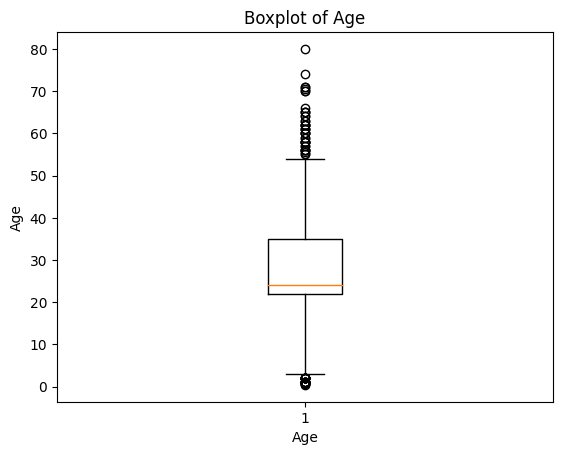

In [115]:
plt.boxplot(df['Age'])
plt.xlabel('Age')
plt.ylabel('Age')
plt.title('Boxplot of Age')
plt.show()

In [116]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
df = df[(df['Age'] >= lower) & (df['Age'] <= upper)]

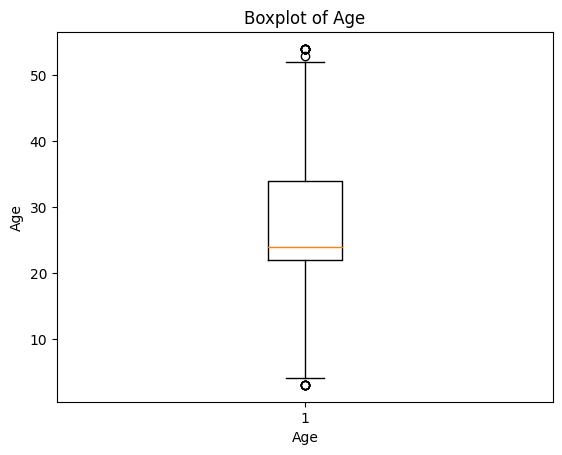

In [117]:
plt.boxplot(df['Age'])
plt.xlabel('Age')
plt.ylabel('Age')
plt.title('Boxplot of Age')
plt.show()

In [118]:
df['SibSp'].unique()

array([1, 0, 3, 2, 4, 5, 8])

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 825 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  825 non-null    int64  
 1   Survived     825 non-null    int64  
 2   Pclass       825 non-null    int64  
 3   Name         825 non-null    object 
 4   Sex          825 non-null    object 
 5   Age          825 non-null    float64
 6   SibSp        825 non-null    int64  
 7   Parch        825 non-null    int64  
 8   Ticket       825 non-null    object 
 9   Fare         825 non-null    float64
 10  Embarked     825 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 77.3+ KB


In [120]:
df['Parch'].unique()

array([0, 2, 1, 5, 3, 4, 6])

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 825 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  825 non-null    int64  
 1   Survived     825 non-null    int64  
 2   Pclass       825 non-null    int64  
 3   Name         825 non-null    object 
 4   Sex          825 non-null    object 
 5   Age          825 non-null    float64
 6   SibSp        825 non-null    int64  
 7   Parch        825 non-null    int64  
 8   Ticket       825 non-null    object 
 9   Fare         825 non-null    float64
 10  Embarked     825 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 77.3+ KB


In [123]:
df.reset_index(drop=True, inplace=True)

In [124]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
820,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
821,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
822,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
823,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [125]:
df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  11.1333,  30.0708,  16.7   ,  31.275 ,   7.8542,
        13.    ,  18.    ,   7.225 ,  26.    ,   8.0292,  35.5   ,
        21.075 ,  31.3875, 263.    ,   7.8792,   7.8958,  27.7208,
       146.5208,   7.75  ,  82.1708,  52.    ,   7.2292,  11.2417,
         9.475 ,  21.    ,  41.5792,  15.5   ,  21.6792,  17.8   ,
        39.6875,   7.8   ,  76.7292,  10.5   ,  27.75  ,  46.9   ,
        80.    ,  83.475 ,  27.9   ,  15.2458,   8.1583,   8.6625,
        73.5   ,  14.4542,  56.4958,   7.65  ,  12.475 ,   9.    ,
         9.5   ,   7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,
        20.575 ,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.525 ,
        66.6   ,   7.3125,  61.3792,   7.7333,  69.55  ,  16.1

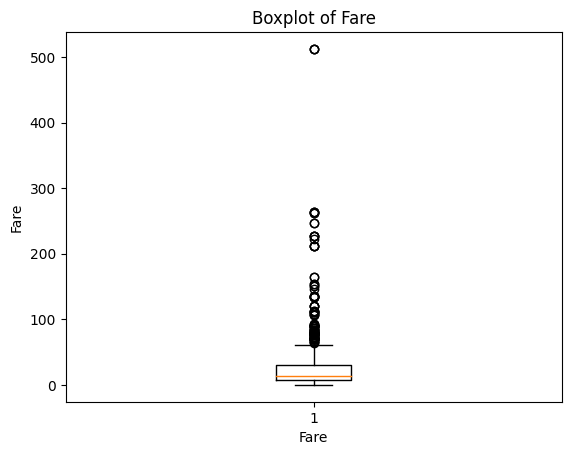

In [126]:
plt.boxplot(df['Fare'])
plt.xlabel('Fare')
plt.ylabel('Fare')
plt.title('Boxplot of Fare')
plt.show()

In [127]:
q1 = df['Fare'].quantile(0.25)
q3 = df['Fare'].quantile(0.75)
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
df = df[(df['Fare'] >= lower) & (df['Fare'] <= upper)]

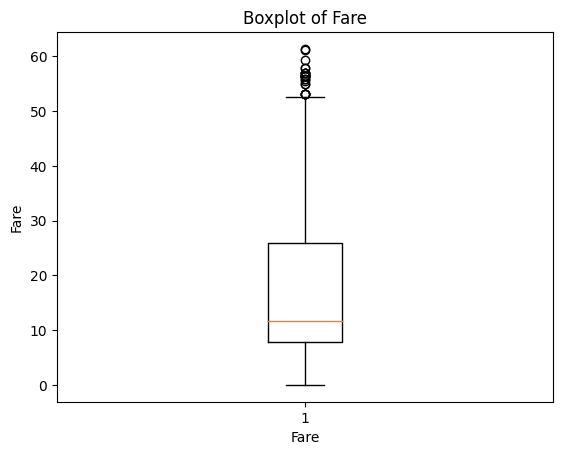

In [128]:
plt.boxplot(df['Fare'])
plt.xlabel('Fare')
plt.ylabel('Fare')
plt.title('Boxplot of Fare')
plt.show()

In [129]:
df['Fare'].unique()

array([ 7.25  ,  7.925 , 53.1   ,  8.05  ,  8.4583, 51.8625, 11.1333,
       30.0708, 16.7   , 31.275 ,  7.8542, 13.    , 18.    ,  7.225 ,
       26.    ,  8.0292, 35.5   , 21.075 , 31.3875,  7.8792,  7.8958,
       27.7208,  7.75  , 52.    ,  7.2292, 11.2417,  9.475 , 21.    ,
       41.5792, 15.5   , 21.6792, 17.8   , 39.6875,  7.8   , 10.5   ,
       27.75  , 46.9   , 27.9   , 15.2458,  8.1583,  8.6625, 14.4542,
       56.4958,  7.65  , 12.475 ,  9.    ,  9.5   ,  7.7875, 47.1   ,
       15.85  , 34.375 , 61.175 , 20.575 , 23.    ,  8.6542,  7.775 ,
       24.15  ,  9.825 , 14.4583,  7.1417, 22.3583,  6.975 ,  7.05  ,
       14.5   , 15.0458, 26.2833,  9.2167,  6.75  , 11.5   , 36.75  ,
        7.7958, 12.525 ,  7.3125, 61.3792,  7.7333, 16.1   , 15.75  ,
       20.525 , 55.    , 25.925 , 29.125 , 25.4667, 28.7125,  0.    ,
       15.05  , 22.025 , 50.    , 26.55  ,  8.4042,  6.4958, 18.7875,
       31.    , 27.    ,  9.35  ,  7.55  , 26.25  , 12.275 ,  7.125 ,
       52.5542, 10.4

In [130]:
df.reset_index(drop=True, inplace=True)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  718 non-null    int64  
 1   Survived     718 non-null    int64  
 2   Pclass       718 non-null    int64  
 3   Name         718 non-null    object 
 4   Sex          718 non-null    object 
 5   Age          718 non-null    float64
 6   SibSp        718 non-null    int64  
 7   Parch        718 non-null    int64  
 8   Ticket       718 non-null    object 
 9   Fare         718 non-null    float64
 10  Embarked     718 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 61.8+ KB


In [132]:
#Some Visualization

In [135]:
a = df.groupby('Survived')['PassengerId'].count()

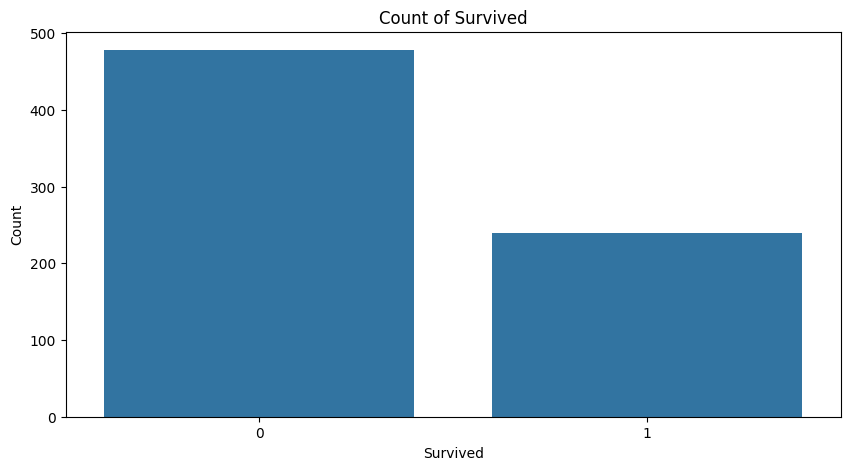

In [137]:
plt.figure(figsize=(10,5))
sns.barplot(a)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Count of Survived')
plt.show()

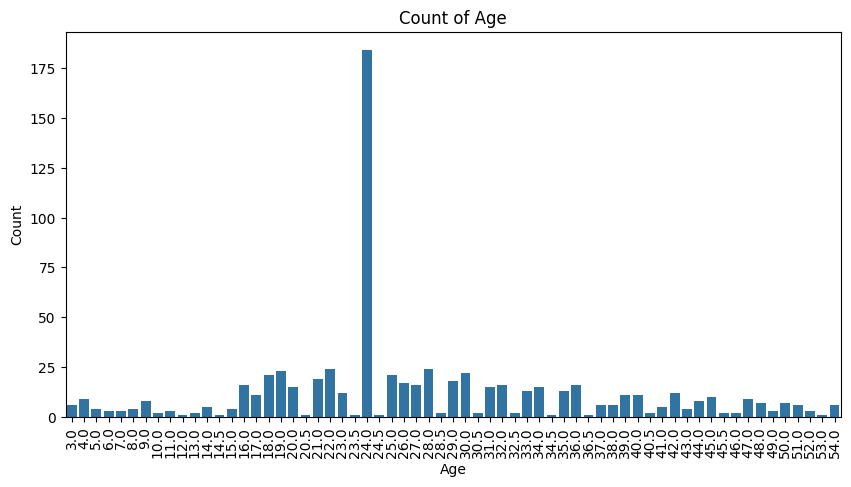

In [141]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Age', data = df)
plt.xlabel('Age')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Count of Age')
plt.show()